### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
data = pd.read_csv("dynamic_pricing.csv", header=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [4]:
data.describe(include="all")

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000
unique,NaN,NaN,3,3,NaN,NaN,4,2,NaN,NaN
top,NaN,NaN,Urban,Silver,NaN,NaN,Night,Premium,NaN,NaN
freq,NaN,NaN,346,367,NaN,NaN,276,522,NaN,NaN
mean,60.372000,27.076000,NaN,NaN,50.031000,4.257220,NaN,NaN,99.58800,372.502623
std,23.701506,19.068346,NaN,NaN,29.313774,0.435781,NaN,NaN,49.16545,187.158756
min,20.000000,5.000000,NaN,NaN,0.000000,3.500000,NaN,NaN,10.00000,25.993449
25%,40.000000,11.000000,NaN,NaN,25.000000,3.870000,NaN,NaN,59.75000,221.365202
50%,60.000000,22.000000,NaN,NaN,51.000000,4.270000,NaN,NaN,102.00000,362.019426
75%,81.000000,38.000000,NaN,NaN,75.000000,4.632500,NaN,NaN,143.00000,510.497504


The dataset has been provided for dynamic pricing case study and contains historical ride data of a ride-sharing company. The goal is to incorporate different features to forecast optimal price for rides in real-time. The dataset is fairly straightfoward and clean with no null values, but it only has 1000 observations (rows) which can be limited. This dataset has been downloaded from https://statso.io/dynamic-pricing-case-study/.

### EDA
### Numerical variables

<Figure size 1300x1700 with 0 Axes>

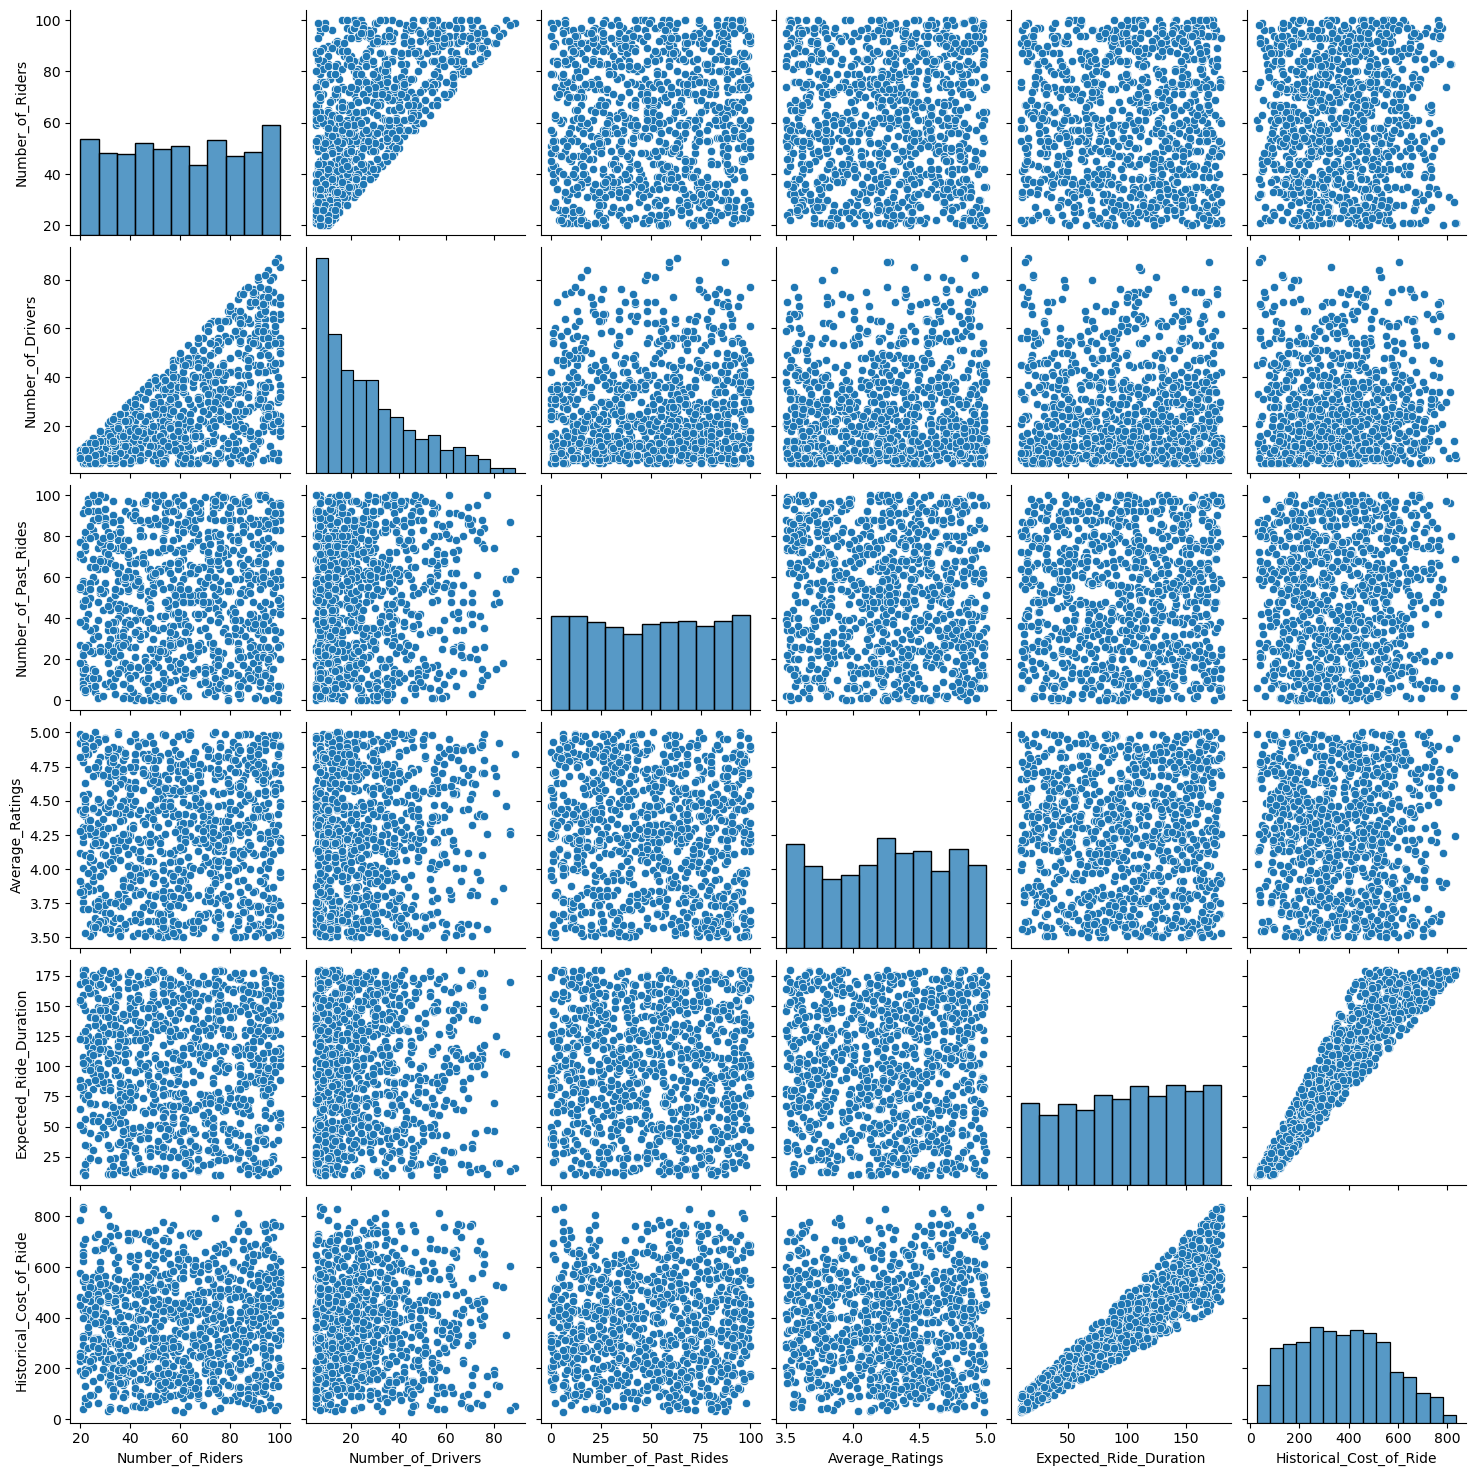

In [5]:
plt.figure(figsize=(13,17))
sns.pairplot(data)
plt.show()

From the above pairplot of numerical variables, one can note that there's a strong pattern between 'Expected_Ride_Duration' and 'Historical_Cost_of_Ride' variables. This observation aligns with our intuitive understanding: longer rides tend to result in higher ride fares. This correlation suggests that as the expected ride duration increases, there is a corresponding increase in the historical cost of the ride. In other words, there is a positive linear relationship between these two variables, indicating that riders can generally expect to pay more for longer trips. <br>
Other variables do not seem to possess strong relationship with each other at this point; further analysis is necessary for discovery.

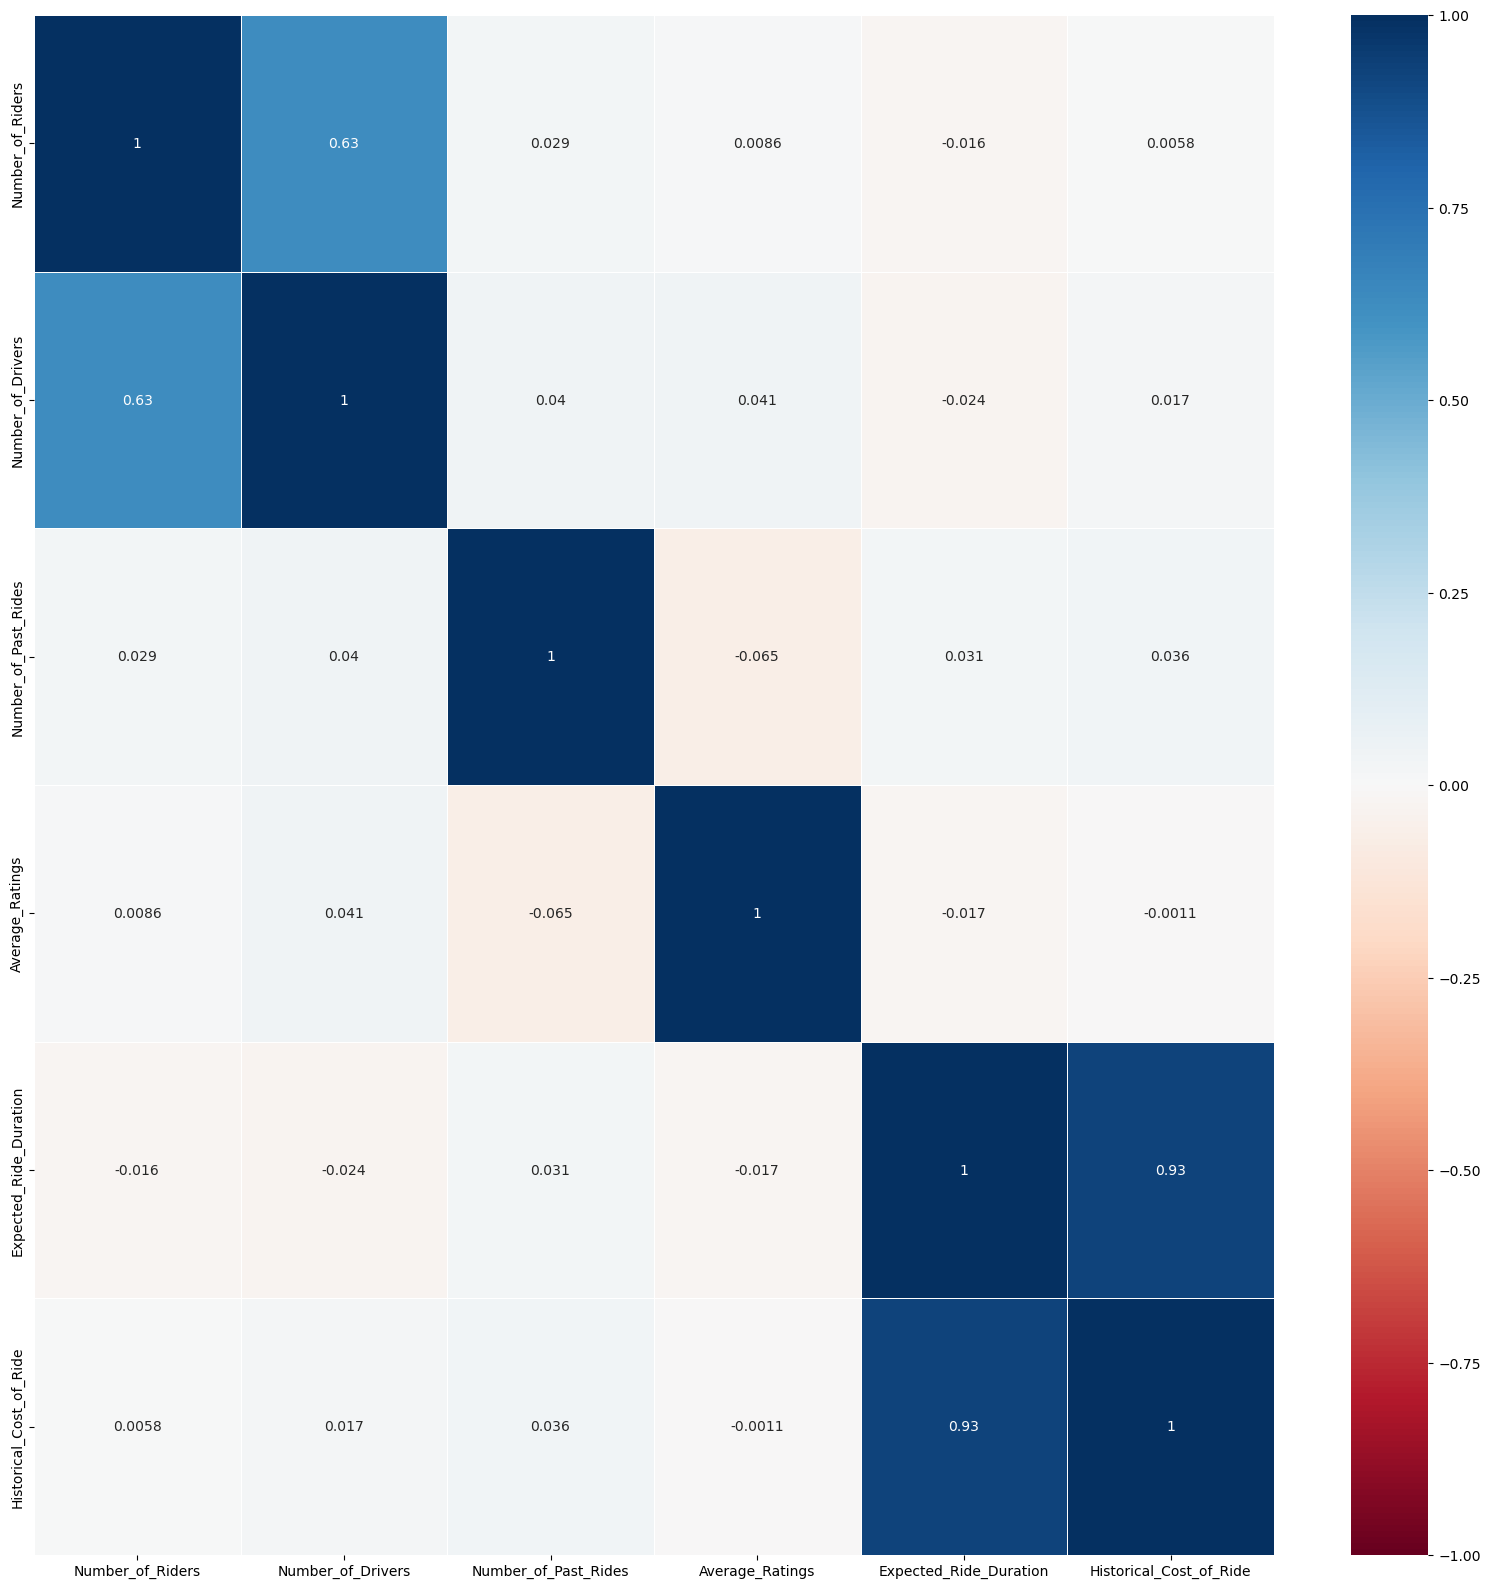

In [7]:
plt.figure(figsize=(20,20))

sns.heatmap(data.corr(numeric_only = True), annot = True, \
            vmin = -1, vmax = 1, linewidth=.5, cmap = 'RdBu')
plt.show()

### Categorical variables

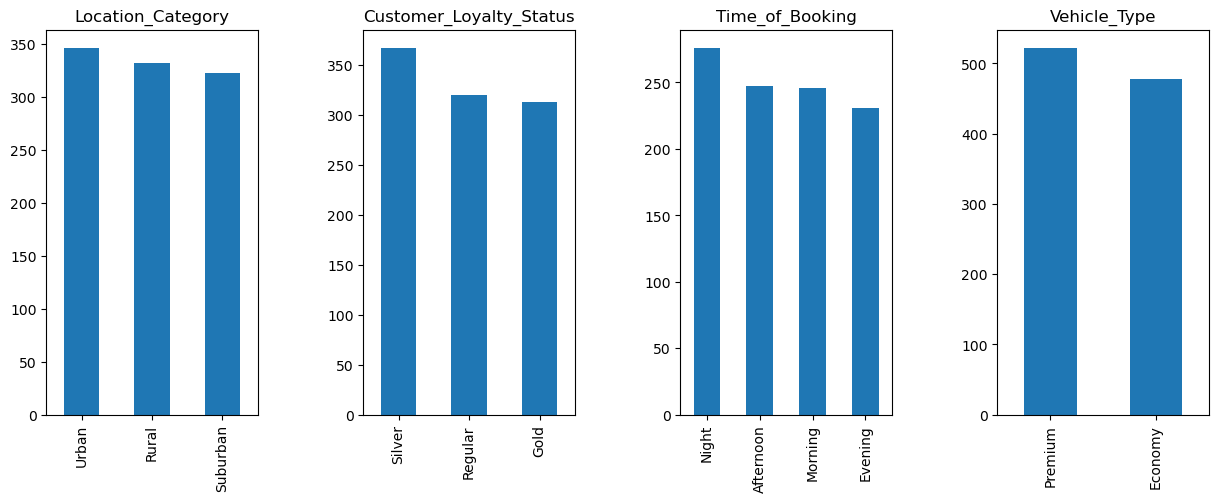

In [17]:
cat = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
fig, ax = plt.subplots(1, len(cat), figsize=(15, 5))  
fig.subplots_adjust(wspace=0.5)  

for i, feature in enumerate(data[cat]):
    data[feature].value_counts().plot(kind="bar", ax=ax[i])
    ax[i].set_title(feature)

plt.show()